In [1]:
import networkx as nx
k=9

G = nx.complete_graph(k)
pos = nx.circular_layout(G)

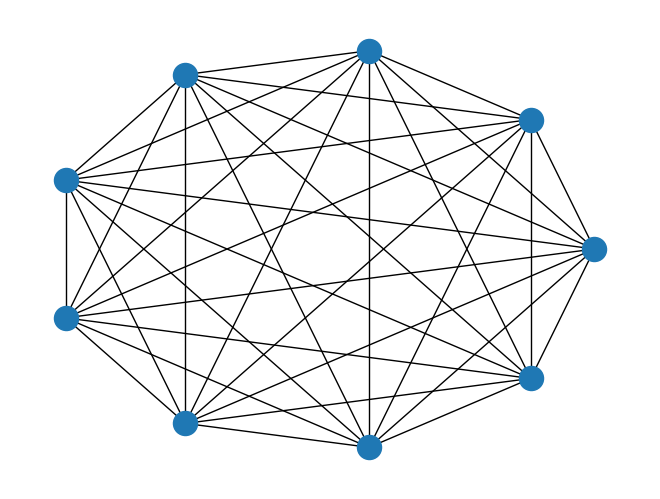

In [2]:
import matplotlib.pyplot as plt
nx.draw(G, pos=pos)  # networkx draw()
plt.draw()  # pyplot draw()

In [3]:
[G.add_edge(i,i) for i in range(k)]

[None, None, None, None, None, None, None, None, None]

/home/envs/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


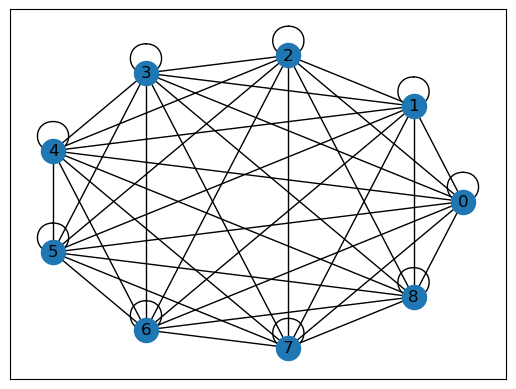

In [4]:
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos=pos, cmap="tab20", with_labels=True)  # networkx draw()
plt.draw() 

In [5]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8))

In [7]:
for node in G.nodes:
    G.nodes[node]['ID'] = node
    

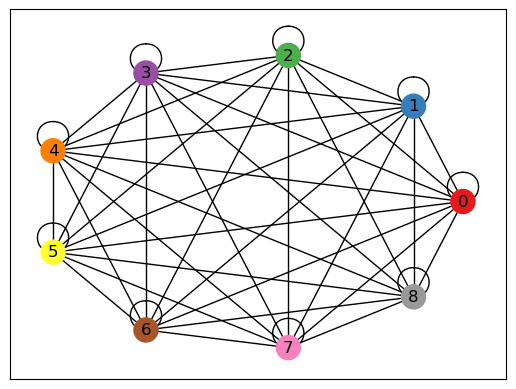

In [10]:
cmap = "tab20" # try plt.cm.Blues if your attribute is a continuous variable
colors = [node for node in list(G.nodes())]
nx.draw_networkx(G, node_color=colors, cmap=cmap, pos=pos)


In [13]:
for node in G.nodes:
    G.nodes[node]['n_weight'] = 0.0
for edge in G.edges:
    G.edges[edge]['e_weight'] = 0.0

In [30]:
G.nodes[0]['n_weight'] = 1.0
G.nodes[4]['n_weight'] = 5.0
G.nodes[7]['n_weight'] = 3.0

G.edges[(0,5)]['e_weight'] = 1.0
G.edges[(4,7)]['e_weight'] = 10.0
G.edges[(1,7)]['e_weight'] = 4.0

(0, 1.0) 300
(1, 0.0) 300
(2, 0.0) 300
(3, 0.0) 300
(4, 5.0) 1000
(5, 0.0) 300
(6, 0.0) 300
(7, 3.0) 600
(8, 0.0) 300


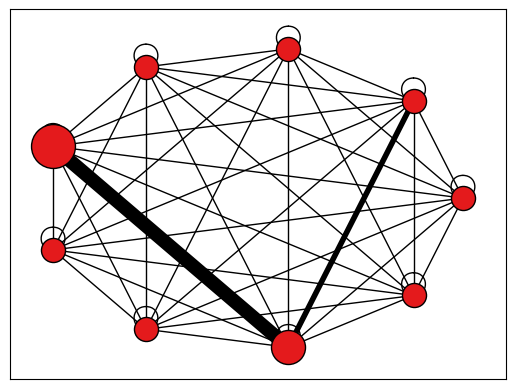

In [81]:
# e_labels = nx.get_edge_attributes(G,'e_weight')
# n_labels = nx.get_node_attributes(G,'n_weight')
import numpy as np
cmap = "Set1" # try plt.cm.Blues if your attribute is a continuous variable
colors = [node for node in list(G.nodes())]
plt.figure()

for idx,node in enumerate(G.nodes(data='n_weight')):
    ns = int(np.max([300, node[1]*200]))
    ns = int(np.min([ns, 1000]))
    print(node, ns)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=[node[0]], node_size=ns, node_color=colors[idx], cmap=cmap, edgecolors='black')
for edge in G.edges(data='e_weight'):
    es = int(np.max([1, edge[2]]))
    es = int(np.min([es, 10]))
    nx.draw_networkx_edges(G, pos=pos, edgelist=[edge[0:2]], width=es)
# nx.draw_networkx(G, pos=pos, node_color=colors, cmap=cmap, )
plt.draw()


(0, 1.0) 300
(1, 0.0) 300
(2, 0.0) 300
(3, 0.0) 300
(4, 5.0) 1000
(5, 0.0) 300
(6, 0.0) 300
(7, 3.0) 600
(8, 0.0) 300


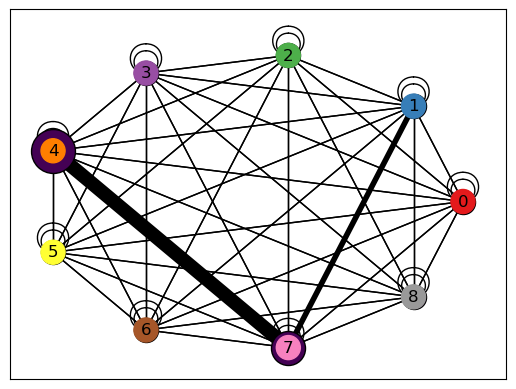

In [84]:
# n_labels = nx.get_node_attributes(G,'n_weight')
import numpy as np
cmap = "Set1" # try plt.cm.Blues if your attribute is a continuous variable
colors = [node for node in list(G.nodes())]
plt.figure()

for idx,node in enumerate(G.nodes(data='n_weight')):
    ns = int(np.max([300, node[1]*200]))
    ns = int(np.min([ns, 1000]))
    print(node, ns)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=[node[0]], node_size=ns, node_color=colors[idx], edgecolors='black')
for edge in G.edges(data='e_weight'):
    es = int(np.max([1, edge[2]]))
    es = int(np.min([es, 10]))
    nx.draw_networkx_edges(G, pos=pos, edgelist=[edge[0:2]], width=es)
nx.draw_networkx(G, pos=pos, node_color=colors, cmap=cmap)
plt.draw()

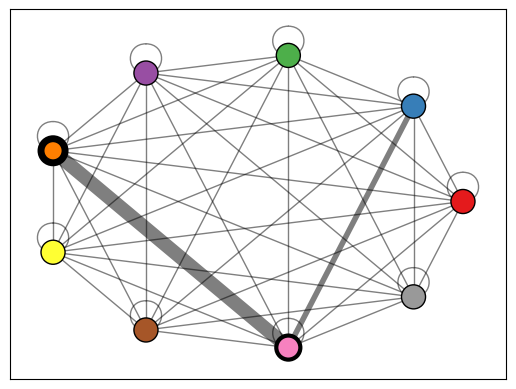

In [97]:
# n_labels = nx.get_node_attributes(G,'n_weight')
import numpy as np
cmap = "Set1" # try plt.cm.Blues if your attribute is a continuous variable
colors = [node for node in list(G.nodes())]
plt.figure()

n_weights = nx.get_node_attributes(G, 'n_weight').values()
n_size = []
for nw in n_weights:
    # ns = int(np.max([300, nw*200]))
    # ns = int(np.min([ns, 1000]))
    ns = int(np.max([1, nw]))
    ns = int(np.min([ns, 10]))
    n_size.append(ns)
nx.draw_networkx_nodes(G, pos=pos, linewidths=n_size, node_color=colors, cmap=cmap, edgecolors='black')

e_weights = nx.get_edge_attributes(G, 'e_weight').values()
e_thickness = []
for ew in e_weights:
    et = int(np.max([1, ew]))
    et = int(np.min([et, 10]))
    e_thickness.append(et)
nx.draw_networkx_edges(G, pos=pos, width=e_thickness, alpha=0.5)


plt.draw()

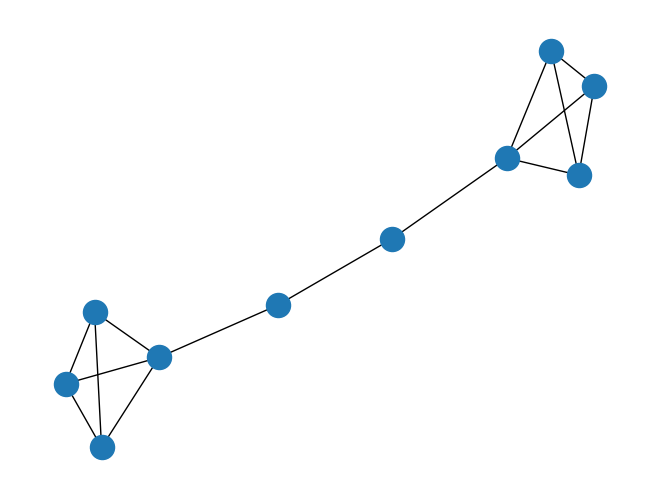

In [120]:
G = nx.barbell_graph(m1=4,m2=2)
pos = nx.circular_layout(G)
nx.draw(G)

In [57]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from k2 import K2Processor, K2Model
from utils import dotdict

In [26]:
args = {"k":20,
        "quantizer_type":"kmeans",
        "embeddings_path":"/home/lofi/lofi/src/outputs_plip/train_plip_sampled_inference_z_embeds.obj",
        "embeddings_type":"dict",
        "mapping_path": None,
        "sample_size":4440,
        "sample_scheme":"random",
        "dataset_path":"/home/data/tinycam/train/train.hdf5",
        "verbosity": "full",
        "so_dict_path": "/home/lofi/lofi/src/outputs/train_so_dict.obj"}
# ViT: "/home/k2/K2/src/outputs_vit/train_vit_iid_chunkid_position.obj"
proc = K2Processor(args)

Embeddings path provided, loading embeddings...


In [27]:
proc.fit_quantizer()

Chosen KMeans model for quantization...
sampled 12 salient objects!
total embeds: 4440
collapsing from dim 512 --> 2


/home/envs/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


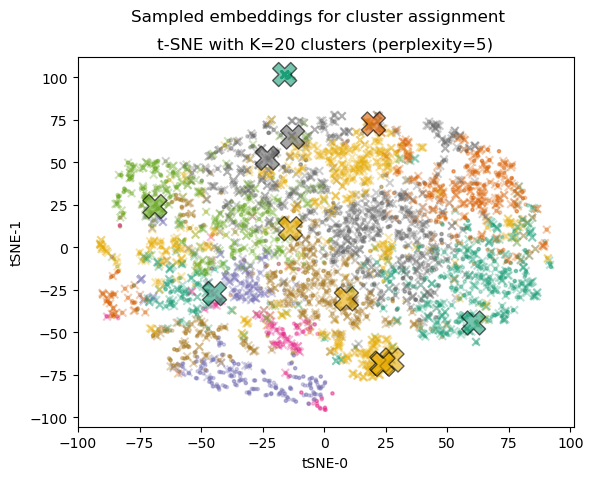

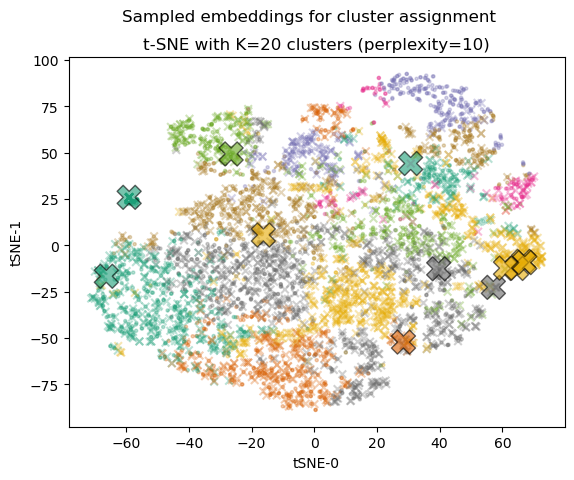

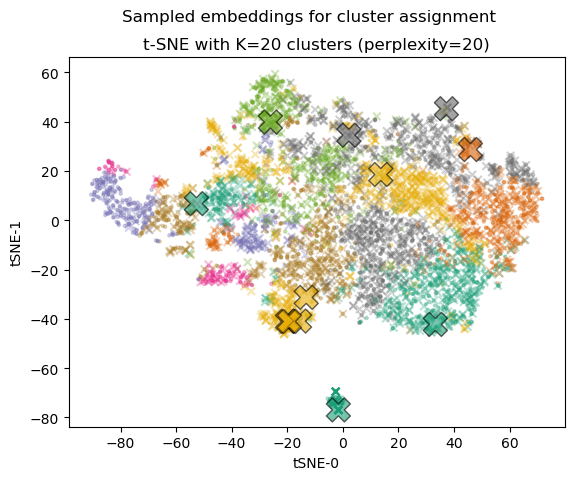

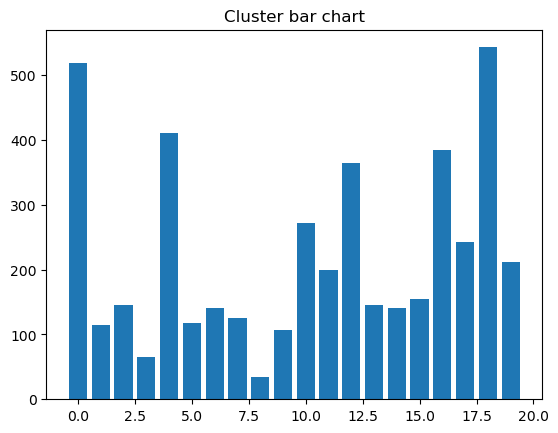

In [28]:
proc.visualize_quantizer()

In [95]:
from utils import convert_arr2graph
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [96]:
A = np.ones((20,30,512))
B = np.ones((50,40,512))
C = np.zeros((130,130,512))
C[45:65,21:51,:] = A
C[70:120,70:110,:] = B
C.shape

(130, 130, 512)

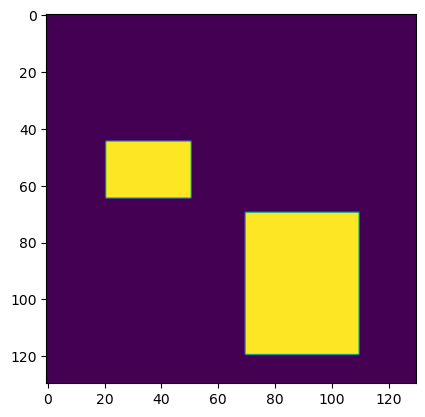

In [97]:
plt.imshow(C[:,:,0])

In [98]:
G = convert_arr2graph(C)


0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67


In [91]:
G.graph["pos_dict"]

{0: (45, 21),
 1: (45, 22),
 2: (45, 23),
 3: (45, 24),
 4: (45, 25),
 5: (45, 26),
 6: (45, 27),
 7: (45, 28),
 8: (45, 29),
 9: (45, 30),
 10: (45, 31),
 11: (45, 32),
 12: (45, 33),
 13: (45, 34),
 14: (45, 35),
 15: (45, 36),
 16: (45, 37),
 17: (45, 38),
 18: (45, 39),
 19: (45, 40),
 20: (45, 41),
 21: (45, 42),
 22: (45, 43),
 23: (45, 44),
 24: (45, 45),
 25: (45, 46),
 26: (45, 47),
 27: (45, 48),
 28: (45, 49),
 29: (45, 50),
 30: (46, 21),
 31: (46, 22),
 32: (46, 23),
 33: (46, 24),
 34: (46, 25),
 35: (46, 26),
 36: (46, 27),
 37: (46, 28),
 38: (46, 29),
 39: (46, 30),
 40: (46, 31),
 41: (46, 32),
 42: (46, 33),
 43: (46, 34),
 44: (46, 35),
 45: (46, 36),
 46: (46, 37),
 47: (46, 38),
 48: (46, 39),
 49: (46, 40),
 50: (46, 41),
 51: (46, 42),
 52: (46, 43),
 53: (46, 44),
 54: (46, 45),
 55: (46, 46),
 56: (46, 47),
 57: (46, 48),
 58: (46, 49),
 59: (46, 50),
 60: (47, 21),
 61: (47, 22),
 62: (47, 23),
 63: (47, 24),
 64: (47, 25),
 65: (47, 26),
 66: (47, 27),
 67: 

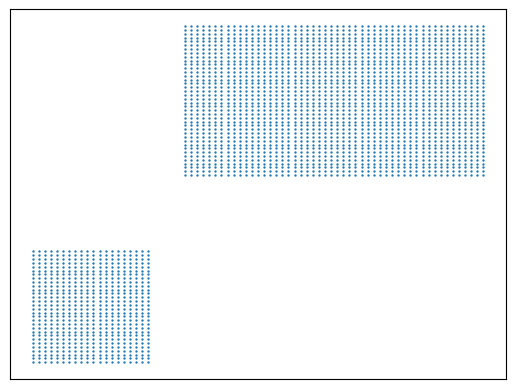

In [108]:
# pos = nx.spring_layout(G)
cmap = "Set1"
colors = [node for node in list(G.nodes())]
plt.figure()

nx.draw_networkx_nodes(G, pos=pos_dict, node_size=0.5)
plt.axis('off')
plt.draw()

(130, 130, 512)


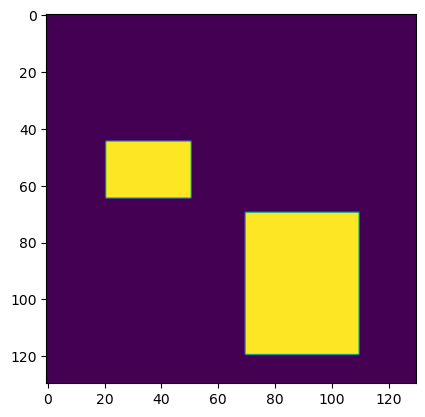

In [107]:
from utils import convert_graph2arr
Arr, _ = convert_graph2arr(G)
print(Arr.shape)
plt.imshow(Arr[:,:,0])